In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP1 - 1er cuatri 2021
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **densidad-alta**: Son instancias con n = 1..200 y con densidad alta, es decir, los números de S son altos en comparación con W.
2. **densidad-baja**: Son instancias con n = 1..200 y con densidad baja, o sea, se necesitan muchos números de S para sumar W.
3. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
4. **peor-caso-BT**: Instancias de peor caos para el algoritmo de BT con podas.
5. **dinamica**: Instancias con n y w variando para probar el algoritmo de PD.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-B**: Backtracking solamente con poda por optimalidad.
- **PD**: Programación dinámica.

# Experimentos
Leemos el dataframe con todos los resultados.

In [44]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados

,dataset,n,R,metodo,tiempo
0,mejor-caso-bt-f,0,1000,BT-F,0.001064
1,mejor-caso-bt-f,1,1000,BT-F,0.001211
2,mejor-caso-bt-f,2,1000,BT-F,0.001024
3,mejor-caso-bt-f,3,1000,BT-F,0.001167
4,mejor-caso-bt-f,4,1000,BT-F,0.001234
...,...,...,...,...,...
1702,pocas-soluciones-validas,20,1000,FB,3.975840
1703,pocas-soluciones-validas,21,1000,FB,8.132320
1704,pocas-soluciones-validas,22,1000,FB,16.449200
1705,pocas-soluciones-validas,23,1000,FB,33.025100


# Complejidad Fuerza Bruta

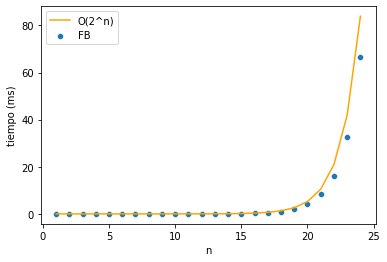

In [46]:
df_FBMS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();

df_FBMS["tiempo_esperado"] = 2.0**(df_FBMS["n"]) * 0.000005; # exponencial

fig = sns.scatterplot(data=df_FBMS, x='n', y='tiempo');
fig = sns.lineplot(data=df_FBMS , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.9999501869096601


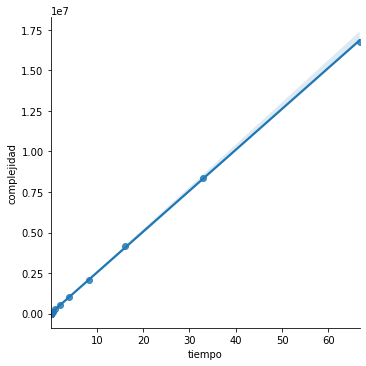

In [49]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_FBMS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="muchas-soluciones-validas")].copy();
df_FBMS["complejidad"] = 2.0 ** df_FBMS["n"];
fig = sns.lmplot(data=df_FBMS, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_FBMS, "tiempo", "complejidad"));

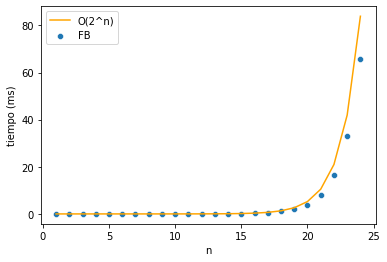

In [47]:
df_FBPS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();

df_FBPS["tiempo_esperado"] = 2.0**(df_FBPS["n"]) * 0.000005; # exponencial

fig = sns.scatterplot(data=df_FBPS, x='n', y='tiempo');
fig = sns.lineplot(data=df_FBPS , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.9999929212328152


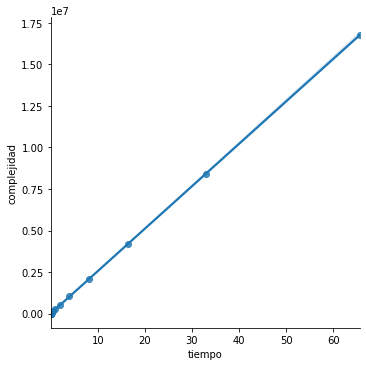

In [50]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_FBPS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="pocas-soluciones-validas")].copy();
df_FBPS["complejidad"] = 2.0 ** df_FBPS["n"];
fig = sns.lmplot(data=df_FBPS, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_FBPS, "tiempo", "complejidad"));

# Complejidad de Backtracking 

## Experimento X: Todos Rompen
### Todos los productos rompen el tubo
En este experimento evaluamos el método BT con el dataset mejor-caso-bt-f, en el que la poda de factibilidad se activa en cada llamado recursivo. La hipótesis es que va a tener un comportamiento lineal para esta instancia.

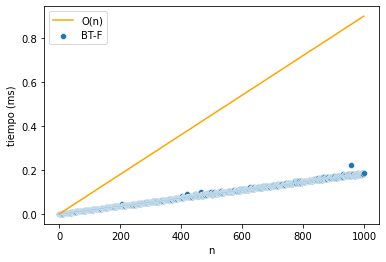

In [59]:
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "mejor-caso-bt-f")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["n"] * 0.0009; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT-F']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.998831082151755


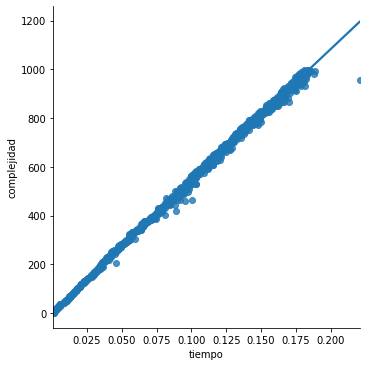

In [5]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "mejor-caso-bt-f")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["n"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mejor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

# Experimento J: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

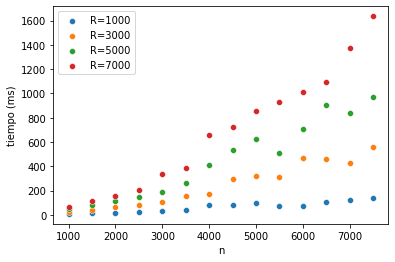

In [58]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==7000], x='n', y='tiempo');
fig.legend(labels=['R=1000','R=3000','R=5000','R=7000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

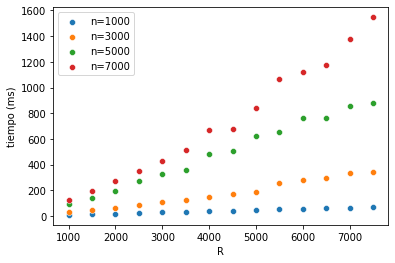

In [59]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='R', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.set(xlabel='R', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-W.svg");

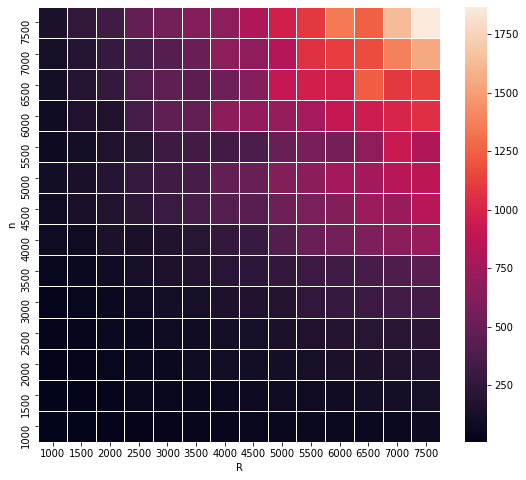

In [60]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='R', values='tiempo', aggfunc=np.mean);

fig, ax = plt.subplots(figsize=(9,8)) 
fig = sns.heatmap(df_heatmap,linewidths=1);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.9728339534391016


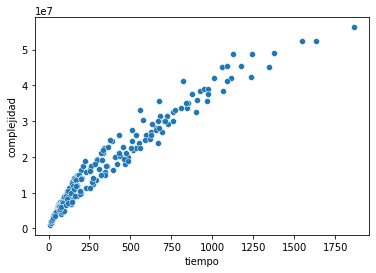

In [61]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["R"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

# Experimento J-MARK2: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

In [63]:
df_resultados["dataset"].unique()

array(['mejor-caso-bt-f', 'dinamica', 'dinamicaM2'], dtype=object)

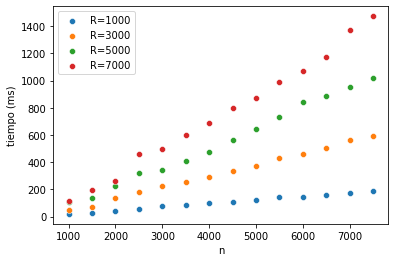

In [64]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamicaM2")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==7000], x='n', y='tiempo');
fig.legend(labels=['R=1000','R=3000','R=5000','R=7000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

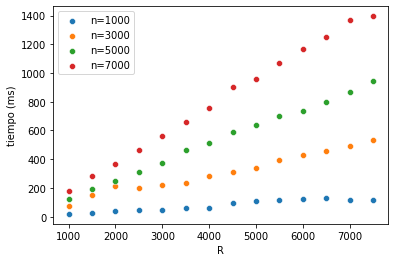

In [65]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamicaM2")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='R', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.set(xlabel='R', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-W.svg");

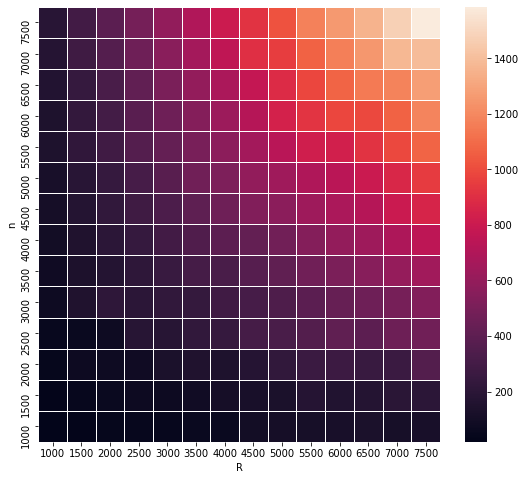

In [66]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamicaM2")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='R', values='tiempo', aggfunc=np.mean);

fig, ax = plt.subplots(figsize=(9,8)) 
fig = sns.heatmap(df_heatmap,linewidths=1);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.9962167010403055


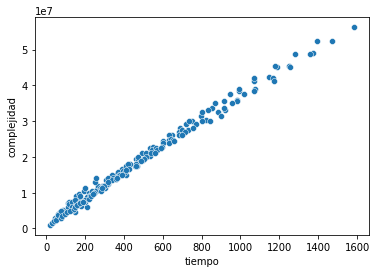

In [67]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamicaM2")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["R"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

# Experimento Campana de Back-Tracking

In [33]:
df_BT

,dataset,n,R,metodo,tiempo
1392,bt,30,1,BT,0.004866
1393,bt,30,6,BT,0.008931
1394,bt,30,11,BT,0.019008
1395,bt,30,16,BT,0.041730
1396,bt,30,21,BT,0.093294
...,...,...,...,...,...
1487,bt,30,476,BT,12.370600
1488,bt,30,481,BT,15.135900
1489,bt,30,486,BT,14.376300
1490,bt,30,491,BT,13.371600


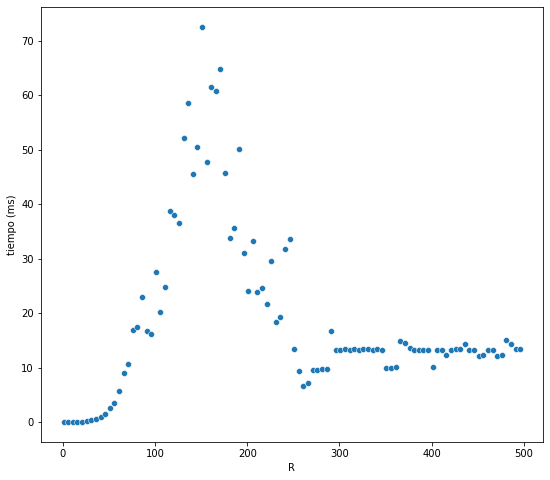

In [32]:
df_BT = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "bt")].copy();

fig, ax = plt.subplots(figsize=(9,8)) 
fig = sns.scatterplot(data=df_BT, x='R', y='tiempo');
fig.set(xlabel='R', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-campana.svg");

# Experimento Campana de Back-Tracking MARK 2

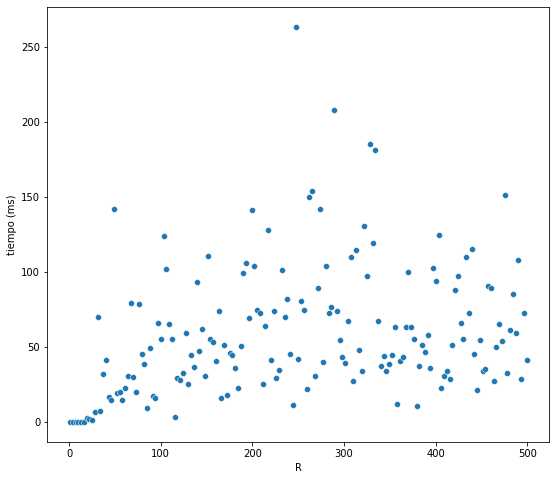

In [28]:
df_BT = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "btM2")].copy();

fig, ax = plt.subplots(figsize=(9,8)) 
fig = sns.scatterplot(data=df_BT, x='R', y='tiempo');
fig.set(xlabel='R', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-campana.svg");